In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import warnings
from scipy import stats
import datetime as dt

In [2]:
volc = np.genfromtxt('nature14565-s6_sigl2015.csv', delimiter=",", dtype=float)
data_mann_2009 = np.genfromtxt('nino3all_mann_2009_v1.txt', delimiter=",", dtype=float) # nino3 reconstruction

data_li_2013 = np.genfromtxt('enso-li2013_nino3.4_v1.txt', delimiter=",", dtype=float) # nino 3.4 reconstruction 
# To address these challenges, we compile and synthesize 2,222 tree-ring chronologies from both the tropics and 
# mid-latitudes of both hemispheres to reconstruct ENSO variability for the past seven centuries.
data_li_2011 = np.genfromtxt('enso-li2011_v1.txt', delimiter=",", dtype=float) # nino 3.4 reconstruction from NADA data

Proxies used in Mann et al 2009 Nino3 reconstructions
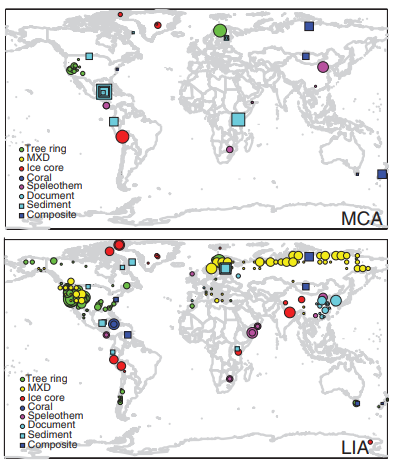

500.0 2006.0


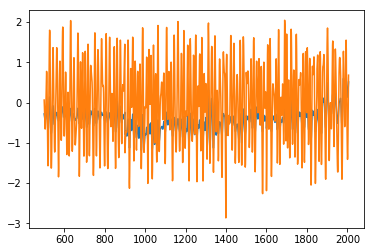

In [3]:
year_mann = data_mann_2009[:,0]
nino3_mann = data_mann_2009[:,1]
plt.plot(data_mann_2009[:,0], data_mann_2009[:,1])
print(year_mann[0], year_mann[-1])

nino3_mann_norm = np.zeros(nino3_mann.shape[0])
win = 30 # 30 year climatology
nino3_mann_norm[0:int(win/2)] = (nino3_mann[0:int(win/2)] - np.mean(nino3_mann[0:win]))/np.std(nino3_mann[0:win])
for i in range(int(win/2),nino3_mann.shape[0]-int(win/2)):
    nino3_mann_norm[i] = (nino3_mann[i] - np.mean(nino3_mann[i-int(win/2):i+int(win/2)]))/np.std(nino3_mann[i-int(win/2):i+int(win/2)])
nino3_mann_norm[nino3_mann.shape[0]-int(win/2):] = (nino3_mann[nino3_mann.shape[0]-int(win/2):] - np.mean(nino3_mann[nino3_mann.shape[0]-int(win/2):]))/np.std(nino3_mann[nino3_mann.shape[0]-int(win/2):])
plt.plot(data_mann_2009[:,0], nino3_mann_norm)

In [4]:
dvolc = np.zeros((nino3_mann.shape[0]))
dvolc_source = np.zeros((nino3_mann.shape[0]))
for i in range(nino3_mann.shape[0]):
    for j in range(volc[:,0].shape[0]):
        if (year_mann[i]==volc[j,0]):
            dvolc[i] = volc[j,2]
            dvolc_source[i] = volc[j,1]
print(dvolc_source)

[0. 2. 0. ... 0. 0. 0.]


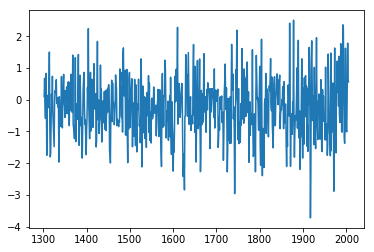

In [5]:
year_li_2013 = data_li_2013[:,0]
nino3_li_2013 = data_li_2013[:,1]
plt.plot(data_li_2013[:,0], data_li_2013[:,1])
#print(year_li_2013)

[ 900.  901.  902. ... 2000. 2001. 2002.]


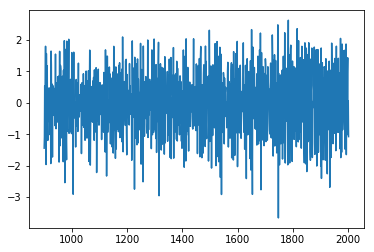

In [6]:
year_li_2011 = data_li_2011[:,0]
nino3_li_2011 = data_li_2011[:,1]
plt.plot(data_li_2011[:,0], data_li_2011[:,1])
print(year_li_2011)

In [7]:
# Extracting different volcanic years
yy_strong_tropical = []
yy_strong_nh = []
yy_strong_sh = []

yy_all_tropical = []
yy_all_nh = []
yy_all_sh = []

for i in range(volc[:,0].shape[0]):
    if (volc[i,1]==1.0) & (np.abs(volc[i,2])>3.7):
        yy_strong_tropical.append(volc[i,0])

    if (volc[i,1]==2.0) & (np.abs(volc[i,2])>3.7):
        yy_strong_nh.append(volc[i,0])

    if (volc[i,1]==3.0) & (np.abs(volc[i,2])>3.7):
        yy_strong_sh.append(volc[i,0])

    if (volc[i,1]==1.0):
        yy_all_tropical.append(volc[i,0])

    if (volc[i,1]==2.0):
        yy_all_nh.append(volc[i,0])

    if (volc[i,1]==3.0):
        yy_all_sh.append(volc[i,0])


In [8]:
np.savetxt('yy_strong_tropical.txt', yy_strong_tropical, delimiter=",") 
np.savetxt('yy_strong_nh.txt', yy_strong_nh, delimiter=",") 
np.savetxt('yy_strong_sh.txt', yy_strong_sh, delimiter=",") 
np.savetxt('yy_all_tropical.txt', yy_all_tropical, delimiter=",") 
np.savetxt('yy_all_nh.txt', yy_all_nh, delimiter=",") 
np.savetxt('yy_all_sh.txt', yy_all_sh, delimiter=",") 

np.savetxt('nino3all_mann_2009_v2.txt', nino3_mann, delimiter=",") 
np.savetxt('nino3all_mann_2009_v3.txt', nino3_mann_norm, delimiter=",") 
np.savetxt('enso-li2013_nino3.4_v2.txt', nino3_li_2013, delimiter=",") 
np.savetxt('enso-li2011_v2.txt', nino3_li_2011, delimiter=",") 

#np.savetxt('yy_strong_tropical.txt', yy_strong_tropical, delimiter=",") 
#np.savetxt('yy_strong_nh.txt', yy_strong_nh, delimiter=",") 
#np.savetxt('yy_strong_sh.txt', yy_strong_sh, delimiter=",") 

In [9]:
yy_strong_tropical_after_en = []
yy_strong_tropical_after_ln = []
yy_strong_tropical_after_nt = []

yy_strong_nh_after_en = []
yy_strong_nh_after_ln = []
yy_strong_nh_after_nt = []

yy_all_tropical_after_en = []
yy_all_tropical_after_ln = []
yy_all_tropical_after_nt = []

yy_all_nh_after_en = []
yy_all_nh_after_ln = []
yy_all_nh_after_nt = []

yy_all_sh_after_en = []
yy_all_sh_after_ln = []
yy_all_sh_after_nt = []

for i in range(1,nino3_mann.shape[0]):
    if (dvolc_source[i]==1.0) & (np.abs(dvolc[i])>3.7) & (nino3_mann_norm[i-1]>1.0):
        yy_strong_tropical_after_en.append(year_mann[i])
    if (dvolc_source[i]==1.0) & (np.abs(dvolc[i])>3.7) & (nino3_mann_norm[i-1]<-1.0):
        yy_strong_tropical_after_ln.append(year_mann[i])
    if (dvolc_source[i]==1.0) & (np.abs(dvolc[i])>3.7) & (-1.0<nino3_mann_norm[i-1]<1.0):
        yy_strong_tropical_after_nt.append(year_mann[i])

    if (dvolc_source[i]==2.0) & (np.abs(dvolc[i])>3.7) & (nino3_mann_norm[i-1]>1.0):
        yy_strong_nh_after_en.append(year_mann[i])
    if (dvolc_source[i]==2.0) & (np.abs(dvolc[i])>3.7) & (nino3_mann_norm[i-1]<-1.0):
        yy_strong_nh_after_ln.append(year_mann[i])
    if (dvolc_source[i]==2.0) & (np.abs(dvolc[i])>3.7) & (-1.0<nino3_mann_norm[i-1]<1.0):
        yy_strong_nh_after_nt.append(year_mann[i])

    if (dvolc_source[i]==1.0) & (nino3_mann_norm[i-1]>1.0):
        yy_all_tropical_after_en.append(year_mann[i])
    if (dvolc_source[i]==1.0) & (nino3_mann_norm[i-1]<-1.0):
        yy_all_tropical_after_ln.append(year_mann[i])
    if (dvolc_source[i]==1.0) & (-1.0<nino3_mann_norm[i-1]<1.0):
        yy_all_tropical_after_nt.append(year_mann[i])

    if (dvolc_source[i]==2.0) & (nino3_mann_norm[i-1]>1.0):
        yy_all_nh_after_en.append(year_mann[i])
    if (dvolc_source[i]==2.0) & (nino3_mann_norm[i-1]<-1.0):
        yy_all_nh_after_ln.append(year_mann[i])
    if (dvolc_source[i]==2.0) & (-1.0<nino3_mann_norm[i-1]<1.0):
        yy_all_nh_after_nt.append(year_mann[i])

    if (dvolc_source[i]==3.0) & (nino3_mann_norm[i-1]>1.0):
        yy_all_sh_after_en.append(year_mann[i])
    if (dvolc_source[i]==3.0) & (nino3_mann_norm[i-1]<-1.0):
        yy_all_sh_after_ln.append(year_mann[i])
    if (dvolc_source[i]==3.0) & (-1.0<nino3_mann_norm[i-1]<1.0):
        yy_all_sh_after_nt.append(year_mann[i])

            

In [10]:
np.savetxt('yy_strong_tropical_after_en.txt',yy_strong_tropical_after_en, delimiter=",") 
np.savetxt('yy_strong_tropical_after_ln.txt', yy_strong_tropical_after_ln, delimiter=",")
np.savetxt('yy_strong_tropical_after_nt.txt', yy_strong_tropical_after_nt, delimiter=",")

np.savetxt('yy_strong_nh_after_en.txt', yy_strong_nh_after_en, delimiter=",")
np.savetxt('yy_strong_nh_after_ln.txt', yy_strong_nh_after_ln, delimiter=",")
np.savetxt('yy_strong_nh_after_nt.txt', yy_strong_nh_after_nt, delimiter=",")

np.savetxt('yy_all_tropical_after_en.txt', yy_all_tropical_after_en, delimiter=",")
np.savetxt('yy_all_tropical_after_ln.txt', yy_all_tropical_after_ln, delimiter=",")
np.savetxt('yy_all_tropical_after_nt', yy_all_tropical_after_nt, delimiter=",")

np.savetxt('yy_all_nh_after_en.txt', yy_all_nh_after_en, delimiter=",")
np.savetxt('yy_all_nh_after_ln.txt', yy_all_nh_after_ln, delimiter=",")
np.savetxt('yy_all_nh_after_nt.txt', yy_all_nh_after_nt, delimiter=",")

np.savetxt('yy_all_sh_after_en.txt', yy_all_sh_after_en, delimiter=",")
np.savetxt('yy_all_sh_after_ln.txt', yy_all_sh_after_ln, delimiter=",")
np.savetxt('yy_all_sh_after_nt.txt', yy_all_sh_after_nt, delimiter=",")